In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
pd.options.mode.chained_assignment = None  # default='warn' - to deal with SettingWithCopyWarning in Pandas

# Part 2 (Task 3) - Exploratory Data Analysis (EDA)

## Introduction
The goal of Case 3 is to build a binary classification model to detect the fraudulent transactions using the kaggle dataset [here](https://www.kaggle.com/datasets/dermisfit/fraud-transactions-dataset). Before building the model, it would be helpful to form a deeper understanding of the data through a process called Exploratory data Analysis (EDA). EDA is an approach to analysing and summarising data in order to understand its main characteristics, identify patterns, detect anomalies, and form hypotheses about relationships between variables. The primary goal of EDA is to gain insights into the data that can inform further analysis or decision-making.

Here are the main steps of EDA that would be conducted in the subsequent parts of this report:
1. **Data processing**: Includes checking and cleaning of data such as data imputation, removal of outliers if applicable
2. **Feature Engineering**: includes adding new features that can help make better models
3. **Data visualisation & analysis**: includes visualising data through graphs, charts and histograms to understand the patterns and relationships between variables. Also includes statistical methods used such as averages, correlation and regression

-----------

## 1. Data processing

### part (a) - Checking of data

In [12]:
# Load data into pandas dataframe
""" Note: change FILE_PATH in config to a suitable path if you're running in a new environment """
TRAIN_FILE_PATH = './src/data/fraudTrain.csv'
TEST_FILE_PATH = './src/data/fraudTest.csv'
df_train = pd.read_csv(TRAIN_FILE_PATH, index_col = [0])
df_test = pd.read_csv(TEST_FILE_PATH, index_col = [0])

In [15]:
# Print information about df_train
"""
No missing value found
"""
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [16]:
# Print information about df_test
"""
No missing value found
"""
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [47]:
# inspect top 5 rows
"""
Source: https://www.forbes.com/advisor/credit-cards/what-does-your-credit-card-number-mean/
Notes:
1. it might be helpful to group columns into categories such as merchant specific columns, customer specific columns
2. some pre-processing might need to be performed on cc_num for it to be informative e.g first six digits of credit card number represents the issuer identification number (IIN)
First digit represents the credit card network e.g. AMEX starts with 3, Visa starts with 4 etc
3. some columns such as lat long are redundant since there are other cleaner columns that helps identify the city/state of the cardholder
"""
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [31]:
# there are 600 different types of merchants. we might want to consider just using the merchant category instead
df_train['merchant'].value_counts()

fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: merchant, Length: 693, dtype: int64

In [32]:
# what are the categories available in the training dataset and the value counts
df_train['category'].value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

In [46]:
# what are the categories available in the test dataset and the value counts
"""
Similar distribution across train and test set
"""
df_test['category'].value_counts()

gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: category, dtype: int64

In [44]:
# Prints summary statistics of training set
df_train.describe().round(2)

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1.296675e+06,1296675.00,1296675.00,1296675.00
mean,4.171920e+17,70.35,48800.67,38.54,-90.23,88824.44,1.349244e+09,38.54,-90.23,0.01
std,1.308806e+18,160.32,26893.22,5.08,13.76,301956.36,1.284128e+07,5.11,13.77,0.08
min,6.041621e+10,1.00,1257.00,20.03,-165.67,23.00,1.325376e+09,19.03,-166.67,0.00
25%,1.800429e+14,9.65,26237.00,34.62,-96.80,743.00,1.338751e+09,34.73,-96.90,0.00
50%,3.521417e+15,47.52,48174.00,39.35,-87.48,2456.00,1.349250e+09,39.37,-87.44,0.00
75%,4.642255e+15,83.14,72042.00,41.94,-80.16,20328.00,1.359385e+09,41.96,-80.24,0.00
max,4.992346e+18,28948.90,99783.00,66.69,-67.95,2906700.00,1.371817e+09,67.51,-66.95,1.00


In [37]:
# Prints summary statistics of test set
"""
Notes:
1. distribution of values are similar across the training and test set for all metrics except is_fraud
2. mean and standard deviation of is_fraud for test set is much lower than the train set, we might want to perform upsampling on train set
"""
df_test.describe().round(2)

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.00,555719.00,555719.00,555719.00,555719.00,5.557190e+05,555719.00,555719.00,555719.00
mean,4.178387e+17,69.39,48842.63,38.54,-90.23,88221.89,1.380679e+09,38.54,-90.23,0.00
std,1.309837e+18,156.75,26855.28,5.06,13.72,300390.89,5.201104e+06,5.10,13.73,0.06
min,6.041621e+10,1.00,1257.00,20.03,-165.67,23.00,1.371817e+09,19.03,-166.67,0.00
25%,1.800429e+14,9.63,26292.00,34.67,-96.80,741.00,1.376029e+09,34.76,-96.91,0.00
50%,3.521417e+15,47.29,48174.00,39.37,-87.48,2408.00,1.380762e+09,39.38,-87.45,0.00
75%,4.635331e+15,83.01,72011.00,41.89,-80.18,19685.00,1.385867e+09,41.95,-80.26,0.00
max,4.992346e+18,22768.11,99921.00,65.69,-67.95,2906700.00,1.388534e+09,66.68,-66.95,1.00


In [43]:
# Check null values for each column, sorted in descending order
df_train.isnull().sum().sort_values(ascending = False)

trans_date_trans_time    0
cc_num                   0
merch_long               0
merch_lat                0
unix_time                0
trans_num                0
dob                      0
job                      0
city_pop                 0
long                     0
lat                      0
zip                      0
state                    0
city                     0
street                   0
gender                   0
last                     0
first                    0
amt                      0
category                 0
merchant                 0
is_fraud                 0
dtype: int64

In [40]:
# Check for duplicated rows
print(f'Number of duplicated rows in training set: {df_train[df_train.duplicated()].shape[0]}')
print(f'Number of duplicated rows in test set: {df_test[df_test.duplicated()].shape[0]}')

Number of duplicated rows in training set: 0
Number of duplicated rows in test set: 0


In [50]:
# what is the date range of the train dataset
min_date = df_train.iloc[:, 0].min()
max_date = df_train.iloc[:, 0].max()

print("Minimum date:", min_date)
print("Maximum date:", max_date)

Minimum date: 2019-01-01 00:00:18
Maximum date: 2020-06-21 12:13:37


In [59]:
# what is the proportion of fraud cases in training set
train_fraud_prop = df_train['is_fraud'].value_counts().reset_index().rename(columns={'index':'is_fraud', 'is_fraud':'Count'})
train_fraud_prop['Percentage of Fraud (%)'] = round(train_fraud_prop['Count']/train_fraud_prop['Count'].sum() * 100,2)
train_fraud_prop

,is_fraud,Count,Percentage of Fraud (%)
0,0,1289169,99.42
1,1,7506,0.58


In [60]:
# what is the proportion of fraud cases in test set
test_fraud_prop = df_test['is_fraud'].value_counts().reset_index().rename(columns={'index':'is_fraud', 'is_fraud':'Count'})
test_fraud_prop['Percentage of Fraud (%)'] = round(test_fraud_prop['Count']/test_fraud_prop['Count'].sum() * 100,2)
test_fraud_prop

,is_fraud,Count,Percentage of Fraud (%)
0,0,553574,99.61
1,1,2145,0.39


In [81]:
# identify columns that have high cardinality (can consider dropping them)

# calculate cardinality
cardinality = df_train.nunique() / df_train.shape[0]
cardinality = cardinality[cardinality > 0.5]
cardinality

trans_date_trans_time    0.983123
trans_num                1.000000
unix_time                0.983148
merch_lat                0.962311
merch_long               0.983859
date                     0.983123
dtype: float64

## 2. Feature engineering

Here are the following columns that I will be adding:
1. trans_month: month based on trans_date_trans_time column, with the numbers representing the month
2. trans_week: day of week based on trans_date_trans_time column, with 0 as Monday and 6 as Sunday
3. mmi_num: Major Industry Identifier (MII), represented by the first digit
4. bank_num: Issuing bank number, represented by the next 5 digits
5. age_cardholder: age of card holder today based on their date of birth

In [75]:
# adding new features for model training
df_train['date'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_train['trans_week'] = [d.weekday() for d in df_train['date']]
df_train['trans_month'] = [int(d.strftime("%m")) for d in df_train['date']]
df_train['mmi_num'] = [str(cc_num)[0] for cc_num in df_train['cc_num']]
df_train['bank_num'] = [str(cc_num)[1:6] for cc_num in df_train['cc_num']]
df_train['age_cardholder'] = [2023 - int(dob[:4]) for dob in df_train['dob']] # assuming it is currently the year of 2023

In [66]:
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,date,day_of_week,trans_month,mmi_num,bank_num,age_cardholder
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1325376018,36.011293,-82.048315,0,2019-01-01 00:00:18,1,1,2,70318,35
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1325376044,49.159047,-118.186462,0,2019-01-01 00:00:44,1,1,6,30423,45
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1325376051,43.150704,-112.154481,0,2019-01-01 00:00:51,1,1,3,88594,61
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1325376076,47.034331,-112.561071,0,2019-01-01 00:01:16,1,1,3,53409,56
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1325376186,38.674999,-78.632459,0,2019-01-01 00:03:06,1,1,3,75534,37


In [84]:
df_train.shape

(1296675, 29)

## 3. Data Visualisation & analysis

/var/folders/_v/tr1g7_l16hsc5vx2vjb54c7r0000gn/T/ipykernel_10396/148409676.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),cmap="BrBG",annot=True)


<Axes: >

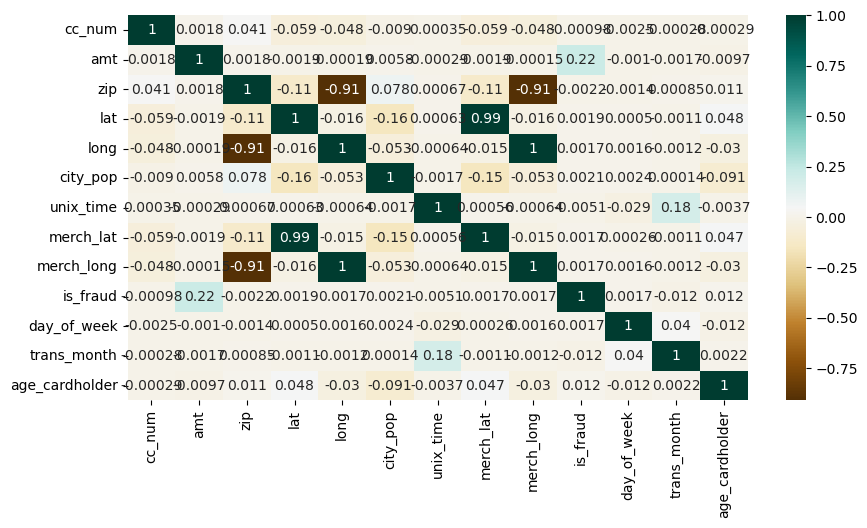

In [68]:
"""
The following cell plots correlation chart. This is helpful when building model as:
1. input variables that are highly correlated with each other -> can consider dropping some of them
2. input variables that are highly correlated with target -> important variables to add into the prediction model

Note:
For input variables that are correlated with one another:
1. lat of cardholder highly correlated with merch_lat, suggesting most transactions are within the neighbourhoods of the cardholders

For input variables that are correlated with target variable:
1. transaction amount is correlated with fraud, suggesting fraud cases tend to have higher transaction amounts
"""
plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(),cmap="BrBG",annot=True)

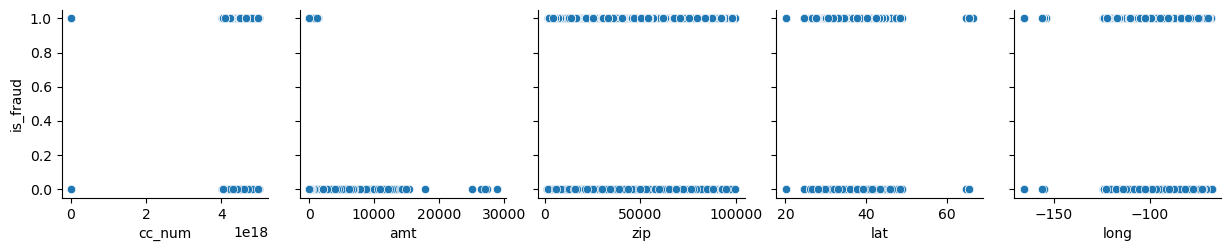

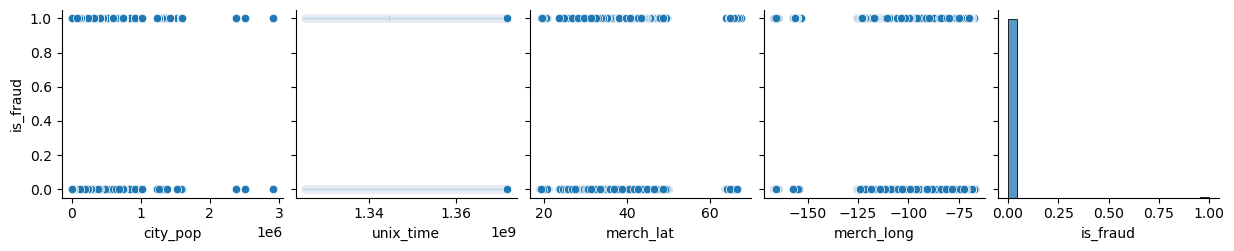

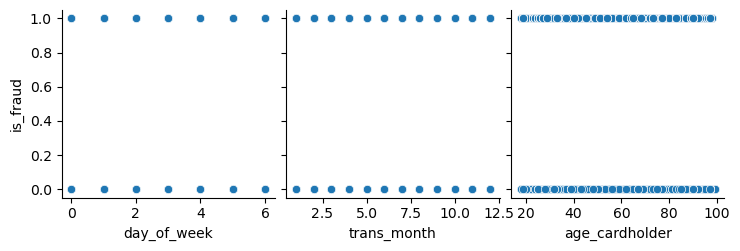

In [70]:
"""
The chart below shows the scatter plots of is_fraud with other numeric variables.

No discernible patterns found. Likely to not contain outliers.
"""
df_num = df_train.select_dtypes(include = ['float64', 'int64'])
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['is_fraud'])

<Axes: xlabel='trans_month', ylabel='is_fraud'>

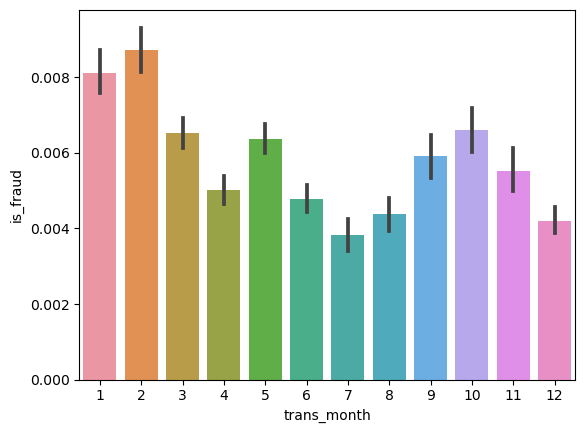

In [73]:
"""
Are there monthly-seasonality when it comes to fraud cases?
The chart below is a bar chart of the proportion of fraud cases in a month.

Notes:
- there seem to be some variations in the proportion of fraud cases across months, peaking around the start of Q1 and Q3
- differences above are not due to noise (stat. sig.)
- distribution seems counter intuitive as we would expect higher proportion of fraud cases during shopping seasons (such as black friday, christmas)
Based on the source linked here (https://www.experianplc.com/media/latest-news/2021/fraud-levels-expected-to-peak-during-online-festive-shopping-period/)
"""
sns.barplot(data=df_train, x="trans_month", y="is_fraud", 
            errorbar=('ci', 95)) # include 95% CI

<Axes: xlabel='trans_week', ylabel='is_fraud'>

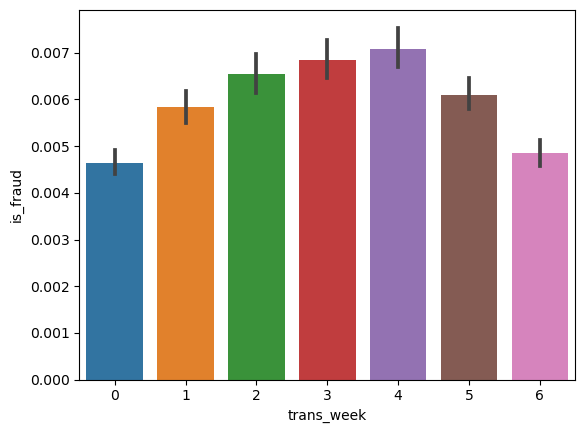

In [76]:
"""
What about day of week? 
The chart below is a bar chart of the proportion of fraud cases in a day of the week.

Notes:
- there is some significant differences across day of weeks and fraud propensity
"""
sns.barplot(data=df_train, x="trans_week", y="is_fraud", 
            errorbar=('ci', 95)) # include 95% CI
